In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
%matplotlib inline

import time
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math

from gym.envs.toy_text.frozen_lake import LEFT, RIGHT, DOWN, UP
from gym.envs.toy_text import frozen_lake, discrete

import gym
from gym.envs.registration import register

register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False})


""" 
    env: gym.core.Environment
    Environment to play on.

    env.P: dictionary
    It is from gym.core.Environment
    P[state][action] is tuples with (probability, nextstate, reward, terminal)
    
    env.nS: int
    count of states 
    
    env.nA: int
    count of actions available
    
    action_space: discrete
                LEFT = 0
                DOWN = 1
                RIGHT = 2
                UP = 3
    ENVIRONMENT: 
                "SFFF",
                "FHFH",
                "FFFH",
                "HFFG"
"""

def print_policy(policy, action_names):
    """ 
    Print the policy in human-readable format.
    """
    str_policy = policy.astype('str')
    for action_num, action_name in action_names.items():
        np.place(str_policy, policy == action_num, action_name)

    print(str_policy[0:4])
    print(str_policy[4:8])
    print(str_policy[8:12])
    print(str_policy[12:16])
    
    return str_policy

action_names = {LEFT: 'LEFT', RIGHT: 'RIGHT', DOWN: 'DOWN', UP: 'UP'}

In [2]:
env = gym.make('D4x4-FrozenLake-v0')
# print(env.nS)
# print(env.P)
grid = 4
gamma = 0.1 # Change this to play with it

Doing Policy Iteration
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

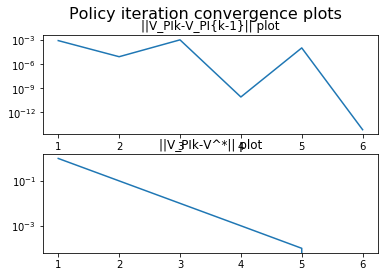

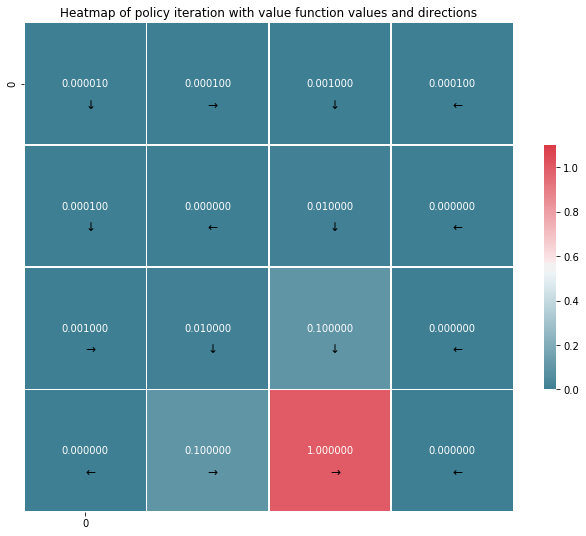

In [3]:
########################################################################
######################### Policy iteration #############################
########################################################################


def policy_evaluation(env, gamma, policy, value_func_old, max_iterations=int(1e3), tol=1e-3):
        
    value_func_new = np.zeros(env.nS)
    value_func_collect = np.zeros((env.nS,max_iterations))

    for iteration in range(max_iterations):
        
        delta=0
        
        for s in range(env.nS):
            value_func_temp = 0
            a = policy[s]
            
            # Using env.P[s][a] implement the V(s) updation given in Figure 4.1
            # Note: Since this is a deterministic policy, the summation over
            # action space is not required.
            
            # Enter your code here
            
            ## Hint: Start with using for loop accessing the next states via env.P[s][a]
            for p, next_s, reward, _ in env.P[s][a]:
                value_func_temp += p*(reward + gamma* value_func_old[next_s])
            
            # Few code compatibility instructions:
            ### Updated V(s) must be in variable "value_func_temp"
            ### The older Value function V(s) is accessed by the variable "value_func_old"
            
            diff=abs(value_func_old[s]-value_func_temp)
            delta=max(delta,diff)
            
            value_func_new[s]=value_func_temp
        
        # Stopping criteria: STOP when the sup norm of (V_k-V_{k-1}) is less than some tolerance level(it's 1e-3 here).
        if delta<=tol: break
        
        value_func_old = value_func_new
        value_func_collect[:,iteration] = value_func_old

    return delta, value_func_new, iteration



def policy_improvement(env, gamma, value_func, policy):
    """
      Given a policy and value function, improve the policy.
      Returns true if policy is unchanged. Also returns the new policy.
      See section 4.2 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    value_func_new = np.zeros(env.nS)
    policy_stable=True
    for s in range(env.nS):
        old_action=policy[s]
        max_value_func=-1
        max_action=-1
        for a in range(env.nA):
            value_func_temp=0
            
            # Copy and paste the V(s) updation which you've implemented in the 
            # policy_evaluation function here (unchanged).
            for p, next_s, reward, _ in env.P[s][a]:
                value_func_temp += p*(reward + gamma* value_func[next_s])
            
            if value_func_temp>max_value_func:
                max_value_func=value_func_temp
                max_action=a
        if max_action!=old_action: policy_stable=False
        policy[s]=max_action
        value_func_new[s]=max_value_func
    return policy_stable, policy, value_func_new


def policy_iteration(env, gamma, max_iterations=int(1e3), tol=1e-3):
    """
       Runs policy iteration.
       Returns optimal policy, value function, number of policy
       improvement iterations, and number of value iterations.
       See section 4.3 of Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) by Sutton and Barto
    """
    policy = np.random.randint(4, size=env.nS)
    value_func_old = np.random.rand(env.nS)
    value_func = np.zeros(env.nS)
    value_func_collect = np.zeros((env.nS,max_iterations))
    delta_collect = np.zeros(max_iterations)
    policy_stable=False
    iters=0
    eval_iters=0
    while not policy_stable:
        delta,value_func,iter=policy_evaluation(env,gamma,policy,value_func_old)
        delta_collect[iters] = delta
        value_func_collect[:,iters] = value_func
        eval_iters+=iter
        policy_stable,policy,value_func_old=policy_improvement(env,gamma,value_func,policy)
        iters+=1

    temp=np.repeat(value_func_collect[:,iters-1], iters, axis=0) 
    temp=temp.reshape(16,iters)
    temp1 = abs(value_func_collect[:,0:iters]-temp)
    distance_from_converged_value_func = temp1.max(axis=0)

    fig = plt.figure()
    fig.suptitle("Policy iteration convergence plots", fontsize=16)
    ax = plt.subplot(2,1,1)
    ax.plot(range(1,iters+1),delta_collect[0:iters])
    ax.set_title('||V_PIk-V_PI{k-1}|| plot')
    ax.set_yscale('log')


    ax = plt.subplot(2,1,2)
    ax.plot(range(1,iters+1),distance_from_converged_value_func)
    ax.set_title('||V_PIk-V^*|| plot')
    ax.set_yscale('log')

    return policy, value_func, iters, eval_iters


print("Doing Policy Iteration")
start_time=time.time()
policy, value_func, policy_iters, val_iters= policy_iteration(env,gamma)
print("Total time taken: "+str((time.time()-start_time)))
print("Total Policy Improvement Steps: "+str(policy_iters))
print("Total Policy Evaluation Steps: "+str(val_iters))
print("Policy:")
policy_str=print_policy(policy,action_names)

f, ax = plt.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
reshaped=np.reshape(value_func,(grid,grid))
seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
            square=True, xticklabels=grid+1, yticklabels=grid+1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
counter=0
for j in range(0, 4):
    for i in range(0, 4):
        if policy_str[counter]=="DOWN":
            plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
        elif policy_str[counter]=="UP":
            plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
        elif policy_str[counter]=="LEFT":
            plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
        else:
            plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
        counter=counter+1
        
plt.title('Heatmap of policy iteration with value function values and directions')

plt.show()

In [4]:
########################################################################
#################### Final policy animation ############################
########################################################################
print("Final Policy Animation")

def run_policy(env,gamma,policy):
    initial_state = env.reset()
    env.render()
    current_state = initial_state
    while True:
        nextstate, reward, done, debug_info = env.step(policy[current_state])
        env.render()

        if done:
            break

        current_state=nextstate
        time.sleep(1)

run_policy(env,gamma,policy)

Final Policy Animation

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
